In [2]:
import numpy as np
import pandas as pd


import tensorflow as tf

In [30]:
data = pd.read_csv('daily_rv_hour_data.csv')

In [31]:
data

,Unnamed: 0,AAPL.O,MSFT.O,GOOGL.O,GOOG.O,AMZN.O,NVDA.O,META.O,BRKb,TSLA.O,...,MDLZ.O,LRCX.O,REGN.O,AMT,PGR,ADP.O,ETN,MMC,ADI.O,CB
0,1/11/2023,0.000130,0.000072,0.000125,0.000110,0.000259,0.000196,0.000155,0.000047,0.000323,...,0.000058,0.000287,0.000251,0.000092,0.000042,0.000038,0.000057,0.000039,0.000053,0.000019
1,1/12/2023,0.000078,0.000201,0.000077,0.000065,0.000077,0.000959,0.000443,0.000018,0.000628,...,0.000050,0.000540,0.000144,0.000229,0.000163,0.000083,0.000051,0.000088,0.000041,0.000069
2,1/13/2023,0.000139,0.000079,0.000071,0.000065,0.000196,0.000579,0.000032,0.000009,0.001005,...,0.000072,0.000113,0.000098,0.000039,0.000006,0.000054,0.000012,0.000044,0.000068,0.000038
3,1/17/2023,0.000024,0.000043,0.000017,0.000020,0.000084,0.000118,0.000088,0.000028,0.000181,...,0.000007,0.000153,0.000055,0.000134,0.000067,0.000099,0.000066,0.000019,0.000068,0.000012
4,1/18/2023,0.000130,0.000188,0.000092,0.000109,0.000180,0.000234,0.000286,0.000099,0.000996,...,0.000195,0.000339,0.000051,0.000368,0.000103,0.000069,0.000254,0.000123,0.000105,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1/4/2024,0.000038,0.000028,0.000059,0.000049,0.000109,0.000132,0.000052,0.000038,0.000119,...,0.000029,0.000140,0.000095,0.000210,0.000174,0.000012,0.000102,0.000010,0.000080,0.000068
247,1/5/2024,0.000139,0.000075,0.000046,0.000044,0.000086,0.000254,0.000111,0.000018,0.000121,...,0.000071,0.000107,0.000088,0.000187,0.000066,0.000017,0.000040,0.000062,0.000069,0.000025
248,1/8/2024,0.000024,0.000044,0.000035,0.000036,0.000052,0.000183,0.000070,0.000048,0.000155,...,0.000025,0.000055,0.000113,0.000071,0.000082,0.000009,0.000074,0.000048,0.000007,0.000042
249,1/9/2024,0.000061,0.000054,0.000073,0.000064,0.000080,0.000658,0.000055,0.000010,0.000159,...,0.000023,0.000064,0.000073,0.000149,0.000046,0.000039,0.000056,0.000018,0.000093,0.000034


In [32]:
data = data.rename(columns={"Unnamed: 0": "Date"})

In [49]:
import datetime

def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1/10/2024')
datetime_object

datetime.datetime(2024, 1, 10, 0, 0)

In [34]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

0     2023-01-11
1     2023-01-12
2     2023-01-13
3     2023-01-17
4     2023-01-18
         ...    
246   2024-01-04
247   2024-01-05
248   2024-01-08
249   2024-01-09
250   2024-01-10
Name: Date, Length: 251, dtype: datetime64[ns]

In [38]:
df = data[['Date', 'MSFT.O']]

In [40]:
df.index = df.pop('Date')
df

,MSFT.O
Date,
2023-01-11,0.000072
2023-01-12,0.000201
2023-01-13,0.000079
2023-01-17,0.000043
2023-01-18,0.000188
...,...
2024-01-04,0.000028
2024-01-05,0.000075
2024-01-08,0.000044


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

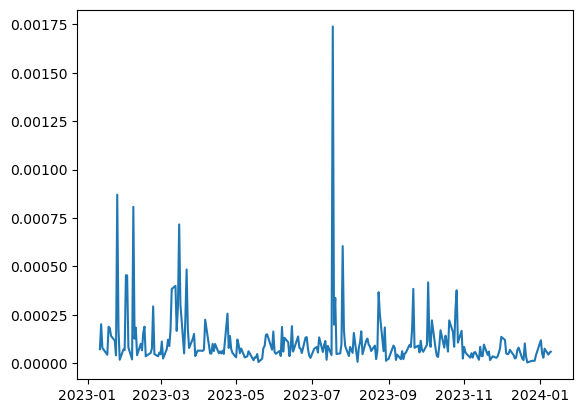

In [43]:
plt.plot(df.index, df['MSFT.O'])

In [74]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['MSFT.O'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1/17/2023', 
                                '1/10/2024', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-17,0.000072,0.000201,0.000079,0.000043
1,2023-01-18,0.000201,0.000079,0.000043,0.000188
2,2023-01-19,0.000079,0.000043,0.000188,0.000181
3,2023-01-20,0.000043,0.000188,0.000181,0.000141
4,2023-01-23,0.000188,0.000181,0.000141,0.000117
...,...,...,...,...,...
243,2024-01-04,0.000041,0.000119,0.000050,0.000028
244,2024-01-05,0.000119,0.000050,0.000028,0.000075
245,2024-01-08,0.000050,0.000028,0.000075,0.000044
246,2024-01-09,0.000028,0.000075,0.000044,0.000054


In [75]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

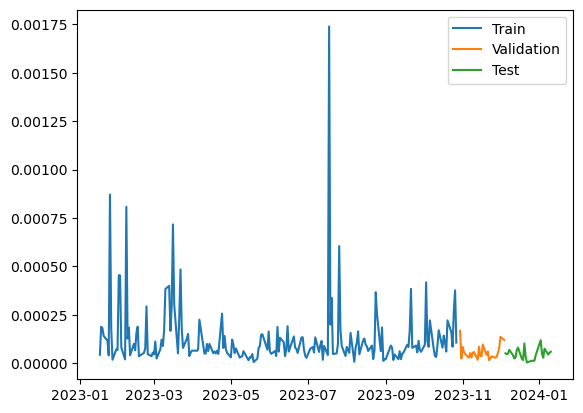

In [76]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100


7/7 [==============================] - 11s 254ms/step - loss: 8.4091e-07 - mean_absolute_error: 7.1088e-04 - val_loss: 1.2687e-07 - val_mean_absolute_error: 3.5421e-04
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 1.3596e-07 - mean_absolute_error: 3.0330e-04 - val_loss: 3.7180e-08 - val_mean_absolute_error: 1.8918e-04
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 1.0212e-07 - mean_absolute_error: 2.5597e-04 - val_loss: 3.3494e-08 - val_mean_absolute_error: 1.7917e-04
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 5.7486e-08 - mean_absolute_error: 1.6487e-04 - val_loss: 3.6133e-08 - val_mean_absolute_error: 1.8639e-04
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 3.5845e-08 - mean_absolute_error: 1.2148e-04 - val_loss: 1.9757e-07 - val_mean_absolute_error: 4.4292e-04
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 6.9340e-08 - mean_absolute_error:

7/7 [==============================] - 0s 17ms/step - loss: 5.1428e-08 - mean_absolute_error: 1.5480e-04 - val_loss: 6.5533e-09 - val_mean_absolute_error: 7.5240e-05
Epoch 44/100
7/7 [==============================] - 0s 19ms/step - loss: 3.4469e-08 - mean_absolute_error: 1.0800e-04 - val_loss: 4.1310e-09 - val_mean_absolute_error: 5.2389e-05
Epoch 45/100
7/7 [==============================] - 0s 15ms/step - loss: 3.5685e-08 - mean_absolute_error: 1.1425e-04 - val_loss: 8.5564e-09 - val_mean_absolute_error: 8.6596e-05
Epoch 46/100
7/7 [==============================] - 0s 16ms/step - loss: 3.8932e-08 - mean_absolute_error: 1.1465e-04 - val_loss: 1.6436e-08 - val_mean_absolute_error: 1.2268e-04
Epoch 47/100
7/7 [==============================] - 0s 21ms/step - loss: 5.6541e-08 - mean_absolute_error: 1.6650e-04 - val_loss: 3.1252e-08 - val_mean_absolute_error: 1.7282e-04
Epoch 48/100
7/7 [==============================] - 0s 16ms/step - loss: 6.7176e-08 - mean_absolute_error: 1.9068e-04 

Epoch 89/100
7/7 [==============================] - 0s 16ms/step - loss: 4.1784e-08 - mean_absolute_error: 1.3305e-04 - val_loss: 9.2882e-09 - val_mean_absolute_error: 9.0471e-05
Epoch 90/100
7/7 [==============================] - 0s 19ms/step - loss: 3.9512e-08 - mean_absolute_error: 1.1698e-04 - val_loss: 6.5112e-09 - val_mean_absolute_error: 7.4991e-05
Epoch 91/100
7/7 [==============================] - 0s 19ms/step - loss: 3.9032e-08 - mean_absolute_error: 1.2165e-04 - val_loss: 3.2527e-08 - val_mean_absolute_error: 1.7647e-04
Epoch 92/100
7/7 [==============================] - 0s 15ms/step - loss: 4.2182e-08 - mean_absolute_error: 1.4577e-04 - val_loss: 6.5408e-08 - val_mean_absolute_error: 2.5303e-04
Epoch 93/100
7/7 [==============================] - 0s 16ms/step - loss: 5.8586e-08 - mean_absolute_error: 2.0077e-04 - val_loss: 9.6555e-09 - val_mean_absolute_error: 9.0941e-05
Epoch 94/100
7/7 [==============================] - 0s 16ms/step - loss: 5.5112e-08 - mean_absolute_error

7/7 [==============================] - 1s 5ms/step


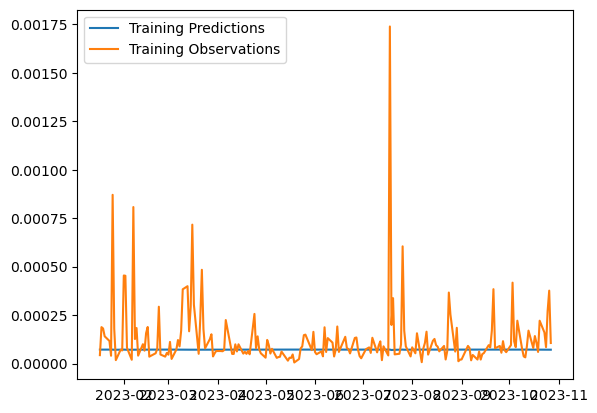

In [78]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 33ms/step


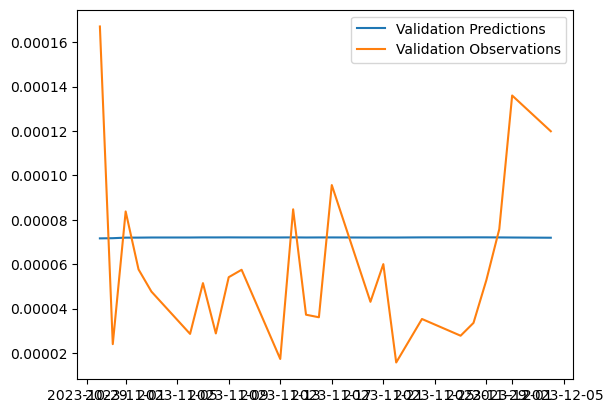

In [79]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 34ms/step


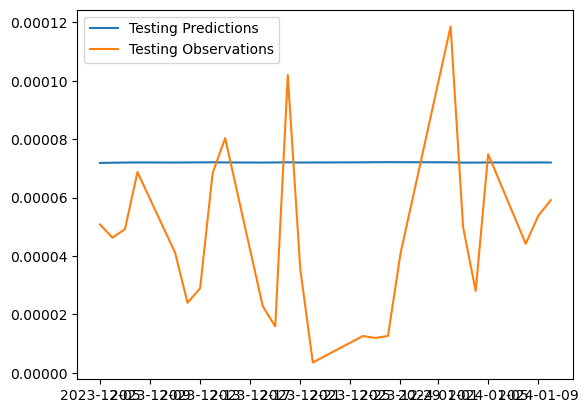

In [80]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

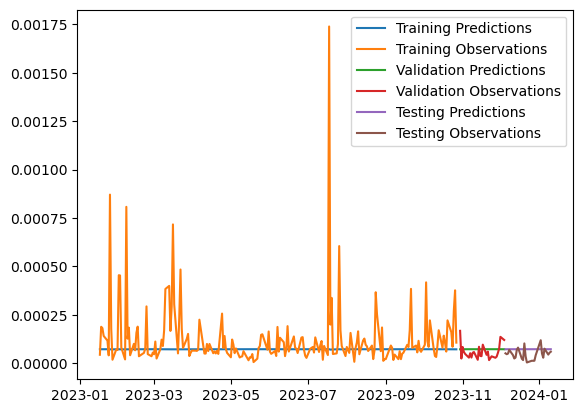

In [81]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [82]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 34ms/step


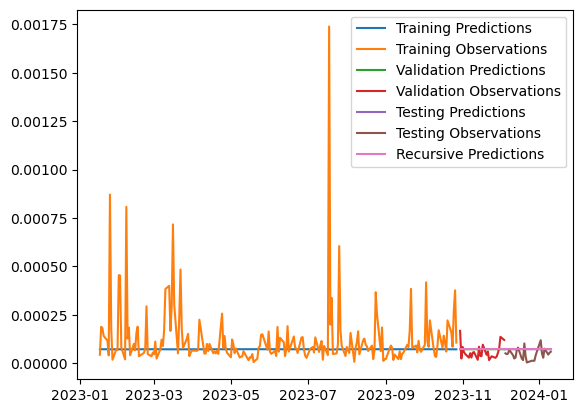

In [83]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])